<a href="https://colab.research.google.com/github/DurjoyAcharya/Diabetes-Prediction/blob/main/Diabetes_Prediction_with_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sbs

sbs.set_theme()

# %matplotlib qt
%matplotlib inline

In [3]:
dataset = pd.read_csv('/content/diabetes.csv')

In [4]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4083 entries, 0 to 4082
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               4083 non-null   int64  
 1   Glucose                   4083 non-null   int64  
 2   BloodPressure             4083 non-null   int64  
 3   SkinThickness             4083 non-null   int64  
 4   Insulin                   4083 non-null   int64  
 5   BMI                       4083 non-null   float64
 6   DiabetesPedigreeFunction  4083 non-null   float64
 7   Age                       4083 non-null   int64  
 8   Outcome                   4083 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 287.2 KB


In [6]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,4083.000000,4083.000000,4083.000000,4083.000000,4083.000000,4083.000000,4083.000000,4083.000000,4083.000000
mean,3.810923,120.748714,69.087436,20.539309,78.860152,31.917218,0.472941,33.090865,0.351457
std,3.368952,31.629152,19.116445,15.692042,112.168083,7.998127,0.327511,11.630828,0.477484
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,0.000000,0.000000,27.050000,0.249000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,36.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.500000,80.000000,32.000000,126.000000,36.600000,0.626000,40.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
dataset[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = dataset[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)

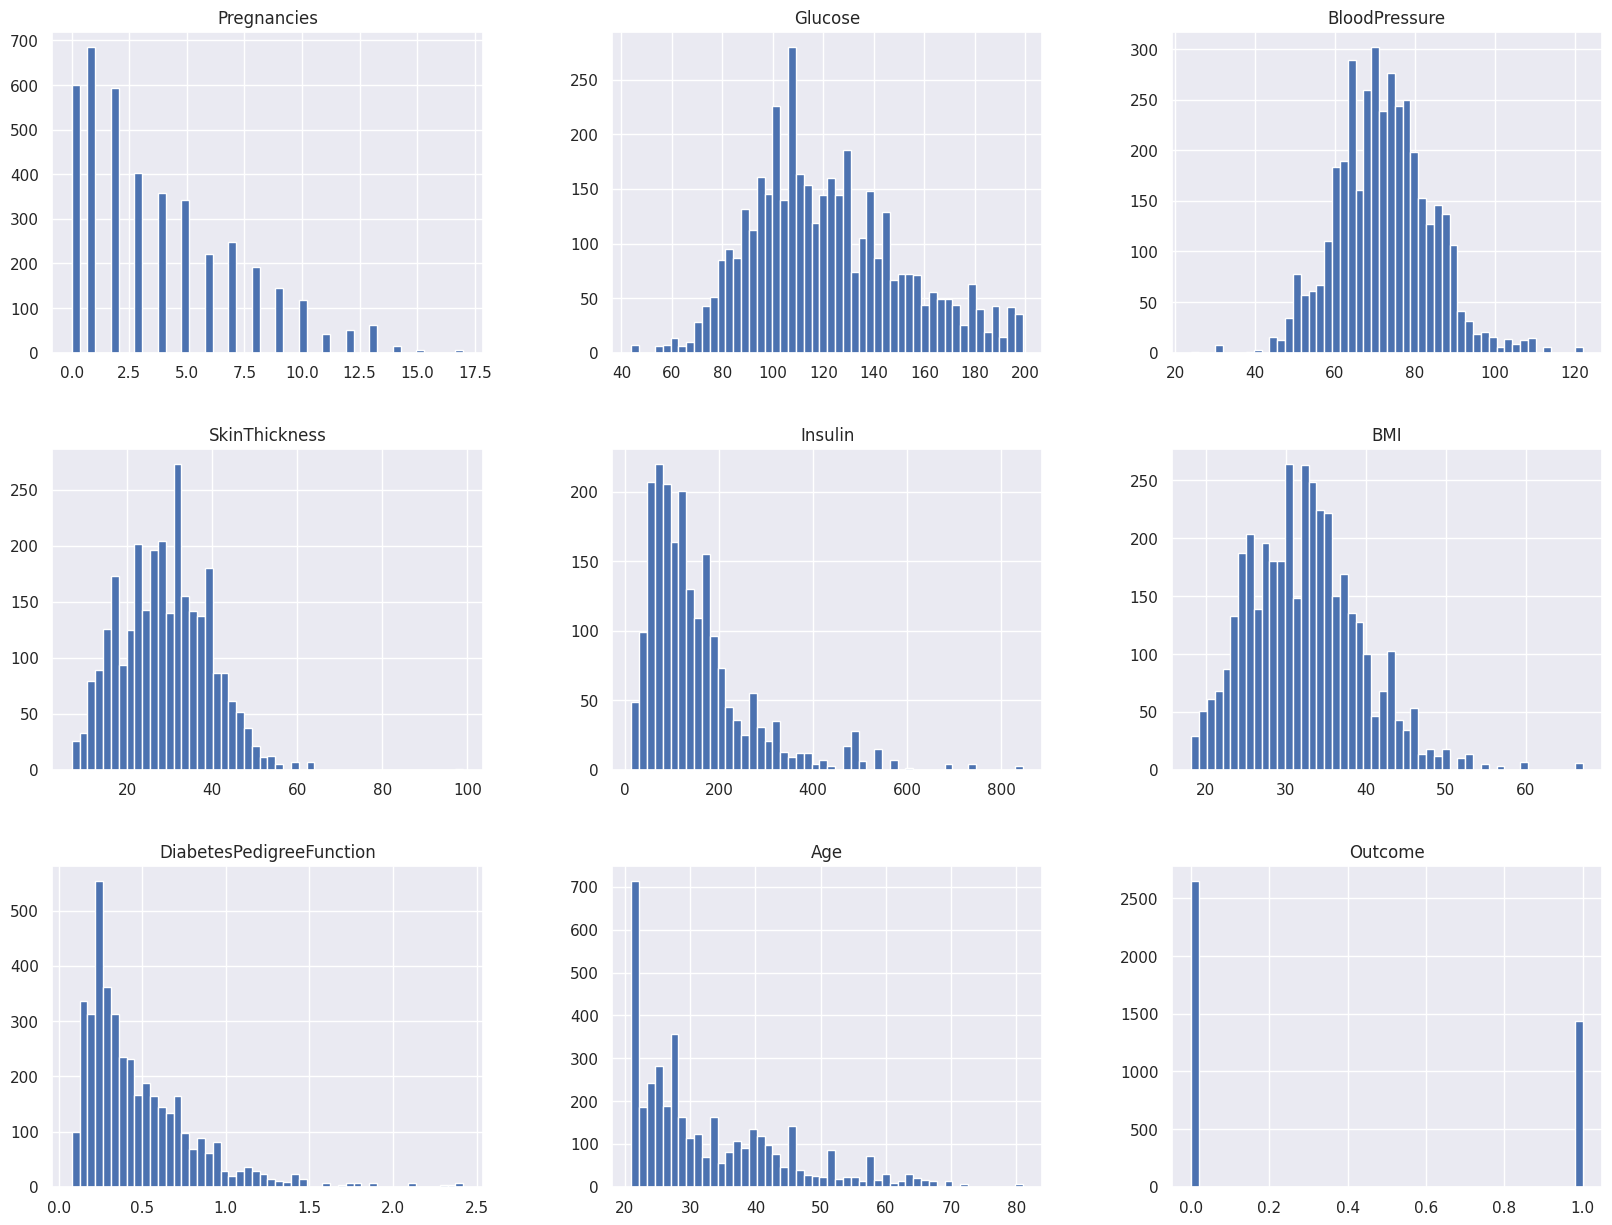

In [10]:
_ = dataset.hist(bins=50, figsize=(20, 15))

<Axes: >

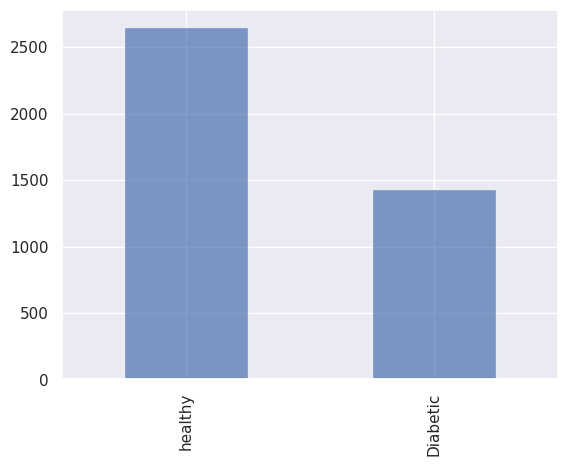

In [13]:
Healthy =  dataset[ dataset['Outcome'] == 0 ]
Diabetic = dataset[ dataset['Outcome'] == 1 ]

h_diab = pd.Series({'healthy':Healthy.shape[0],
            'Diabetic':Diabetic.shape[0]})
h_diab.plot.bar(alpha=0.7)

In [14]:
dataset.isnull().sum()

Pregnancies                    0
Glucose                       30
BloodPressure                185
SkinThickness               1180
Insulin                     1981
BMI                           62
DiabetesPedigreeFunction       0
Age                            0
Outcome                        0
dtype: int64

In [15]:
dataset.pivot_table(index=['Outcome'] )

,Age,BMI,BloodPressure,DiabetesPedigreeFunction,Glucose,Insulin,Pregnancies,SkinThickness
Outcome,,,,,,,,
0,31.234139,30.733911,70.838684,0.432184,111.174591,130.149117,3.288520,26.983033
1,36.517073,35.458275,75.269345,0.548151,140.968399,200.618632,4.774913,32.755741


In [16]:
def replace_null_values(dataset):
    for col in dataset.columns:
        dataset.loc[(dataset['Outcome']==0) & (dataset[col].isnull()), col] = dataset[dataset['Outcome'] == 0][col].median()
        dataset.loc[(dataset['Outcome']==1) & (dataset[col].isnull()), col] = dataset[ dataset['Outcome'] == 1][col].median()
    print(dataset.isnull().sum())

replace_null_values(dataset)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [17]:
def create_new_bmi(dataset):
    new_cat = "NEW_BMI_CAT"
    dataset.loc[(dataset['BMI'] < 18.5), new_cat] = "underweight"
    dataset.loc[(dataset['BMI'] > 18.5) & (dataset['BMI'] < 25), new_cat] = "normal"
    dataset.loc[(dataset['BMI'] > 24) & (dataset['BMI'] < 30), new_cat] =  "overweight"
    dataset.loc[(dataset['BMI'] > 30) & (dataset['BMI']< 40), new_cat] = "obese"
    dataset.drop('BMI', axis=1, inplace=True)
    dataset[new_cat] = dataset[new_cat].astype('category')

def create_new_glucose(dataset):
    new_cat = "NEW_GLUCOSE_CAT"
    dataset.loc[(dataset['Glucose'] < 70), new_cat] = "low"
    dataset.loc[(dataset['Glucose'] > 70) & (dataset['Glucose'] < 99), new_cat] = "normal"
    dataset.loc[(dataset['Glucose'] > 99) & (dataset['Glucose'] < 126), new_cat] = "high"
    dataset.loc[(dataset['Glucose'] > 126) & (dataset['Glucose'] < 200), new_cat] = "very_high"
    dataset[new_cat] = dataset[new_cat].astype('category')


def create_new_skinthickness(dataset):
    new_cat = "NEW_SKIN_THICKNESS"
    dataset.loc[dataset['SkinThickness'] < 30, new_cat] = "normal"
    dataset.loc[dataset['SkinThickness'] >= 70, new_cat] = "highfat"
    dataset[new_cat] = dataset[new_cat].astype('category')

def create_new_pregnancies(dataset):
    new_cat = "NEW_PREGNANCIES"
    dataset.loc[dataset['Pregnancies'] == 0, new_cat] = "no_pregnancies"
    dataset.loc[(dataset['Pregnancies'] > 0) & dataset['Pregnancies'] <= 4, new_cat] = "std_pregnancies"
    dataset.loc[(dataset['Pregnancies'] > 4), new_cat] = "over_pregnancies"
    dataset[new_cat] = dataset[new_cat].astype('category')

def create_circulation_level(dataset):
    new_cat = "NEW_CIRCULATION_LEVEL"
    dataset.loc[(dataset['SkinThickness'] < 30) & (dataset['BloodPressure'] < 80), new_cat] = "normal"
    dataset.loc[(dataset['SkinThickness'] > 30) & (dataset['BloodPressure']>= 80), new_cat] = "high_risk"
    dataset.loc[((dataset['SkinThickness']< 30) & (dataset['BloodPressure'] >=80)) | ((dataset['SkinThickness']> 30) & (dataset['BloodPressure'] <80)), new_cat] = "medium_risk"
    dataset[new_cat] = dataset[new_cat].astype('category')
    dataset.drop('SkinThickness', axis=1, inplace=True)

def create_other_features(dataset):
    dataset['PRE_AGE_CAT'] = dataset['Age'] * dataset['Pregnancies']
    dataset['INSULIN_GLUCOSE_CAT'] = dataset['Insulin'] * dataset['Glucose']
    dataset.drop('Pregnancies', axis=1, inplace=True)
    dataset.drop('Glucose', axis=1, inplace=True)

create_new_bmi(dataset)
create_new_glucose(dataset)
create_new_pregnancies(dataset)
create_new_skinthickness(dataset)
create_circulation_level(dataset)
create_other_features(dataset)
dataset

,BloodPressure,Insulin,DiabetesPedigreeFunction,Age,Outcome,NEW_BMI_CAT,NEW_GLUCOSE_CAT,NEW_PREGNANCIES,NEW_SKIN_THICKNESS,NEW_CIRCULATION_LEVEL,PRE_AGE_CAT,INSULIN_GLUCOSE_CAT
0,72.0,168.0,0.627,50,1,obese,very_high,over_pregnancies,NaN,medium_risk,300,24864.0
1,66.0,100.0,0.351,31,0,overweight,normal,std_pregnancies,normal,normal,31,8500.0
2,64.0,168.0,0.672,32,1,normal,very_high,over_pregnancies,NaN,medium_risk,256,30744.0
3,66.0,94.0,0.167,21,0,overweight,normal,std_pregnancies,normal,normal,21,8366.0
4,40.0,168.0,2.288,33,1,NaN,very_high,std_pregnancies,NaN,medium_risk,0,23016.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4078,78.0,100.0,0.391,41,0,obese,low,over_pregnancies,normal,normal,287,6200.0
4079,72.0,100.0,0.370,27,0,obese,normal,over_pregnancies,NaN,medium_risk,135,9500.0
4080,74.0,168.0,0.270,26,1,NaN,very_high,std_pregnancies,NaN,medium_risk,0,22008.0
4081,66.0,100.0,0.307,24,0,overweight,high,std_pregnancies,normal,normal,48,11200.0


In [18]:
dataset['NEW_CIRCULATION_LEVEL'].dtype.name == 'category'

True

In [19]:
len(dataset['NEW_CIRCULATION_LEVEL'].unique())

4

In [20]:
label_encoder = preprocessing.LabelEncoder()
dataset['Outcome'] = label_encoder.fit_transform(dataset['Outcome'])

In [21]:
categ_cols = [col for col in dataset.columns if dataset[col].dtype.name == 'category']
print(categ_cols)

['NEW_BMI_CAT', 'NEW_GLUCOSE_CAT', 'NEW_PREGNANCIES', 'NEW_SKIN_THICKNESS', 'NEW_CIRCULATION_LEVEL']


In [22]:
def one_hot_encoder(dataset, columns):
    dataset_dummy = dataset.copy()
    dataset_dummy = pd.get_dummies(dataset, columns=columns, drop_first=True)
    return dataset_dummy

result = one_hot_encoder(dataset, categ_cols)
result

,BloodPressure,Insulin,DiabetesPedigreeFunction,Age,Outcome,PRE_AGE_CAT,INSULIN_GLUCOSE_CAT,NEW_BMI_CAT_obese,NEW_BMI_CAT_overweight,NEW_BMI_CAT_underweight,NEW_GLUCOSE_CAT_low,NEW_GLUCOSE_CAT_normal,NEW_GLUCOSE_CAT_very_high,NEW_PREGNANCIES_std_pregnancies,NEW_SKIN_THICKNESS_normal,NEW_CIRCULATION_LEVEL_medium_risk,NEW_CIRCULATION_LEVEL_normal
0,72.0,168.0,0.627,50,1,300,24864.0,1,0,0,0,0,1,0,0,1,0
1,66.0,100.0,0.351,31,0,31,8500.0,0,1,0,0,1,0,1,1,0,1
2,64.0,168.0,0.672,32,1,256,30744.0,0,0,0,0,0,1,0,0,1,0
3,66.0,94.0,0.167,21,0,21,8366.0,0,1,0,0,1,0,1,1,0,1
4,40.0,168.0,2.288,33,1,0,23016.0,0,0,0,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4078,78.0,100.0,0.391,41,0,287,6200.0,1,0,0,1,0,0,0,1,0,1
4079,72.0,100.0,0.370,27,0,135,9500.0,1,0,0,0,1,0,0,0,1,0
4080,74.0,168.0,0.270,26,1,0,22008.0,0,0,0,0,0,1,1,0,1,0
4081,66.0,100.0,0.307,24,0,48,11200.0,0,1,0,0,0,0,1,1,0,1


In [23]:
from sklearn.model_selection import train_test_split

X = result.drop('Outcome', axis=1)
y = dataset['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

rmse  = lambda labels, predictions: np.sqrt(mean_squared_error(labels, predictions))

lg_model = LogisticRegression(max_iter=1000,C=0.01).fit(X_train, y_train)
lg_predictions = lg_model.predict(X_test)
rmse(y_test, lg_predictions)

0.44253636380814365

In [28]:
!pip install scikit-learn

In [31]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
# from sklearn.metrics.classification import plot_roc_curve
from sklearn.metrics import recall_score

print(accuracy_score(y_test, lg_predictions))
print(roc_auc_score(y_test, lg_predictions))
# plot_roc_curve(y_test, lg_predictions)

0.8041615667074663
0.7516665319974144


In [32]:
from sklearn.metrics import classification_report

print(classification_report(y_test, lg_predictions))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       544
           1       0.77      0.59      0.67       273

    accuracy                           0.80       817
   macro avg       0.79      0.75      0.77       817
weighted avg       0.80      0.80      0.80       817



In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Initial broad search
param_grid = {'n_estimators': [400, 500, 600, 700],
              'max_leaf_nodes': [14, 15, 16, 17]}
random_forest = RandomForestClassifier(n_jobs=-1)

grid_search_rf = GridSearchCV(random_forest,
                              param_grid=param_grid,
                              cv=3,
                              scoring='recall',
                              return_train_score=True)
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1),
             param_grid={'max_leaf_nodes': [14, 15, 16, 17],
                         'n_estimators': [400, 500, 600, 700]},
             return_train_score=True, scoring='recall')

In [36]:
# Refine the search
best_n_estimators = grid_search_rf.best_params_['n_estimators']
best_max_leaf_nodes = grid_search_rf.best_params_['max_leaf_nodes']

param_grid_refined = {'n_estimators': [best_n_estimators - 50, best_n_estimators, best_n_estimators + 50],
                      'max_leaf_nodes': [best_max_leaf_nodes - 1, best_max_leaf_nodes, best_max_leaf_nodes + 1]}

grid_search_rf_refined = GridSearchCV(random_forest,
                                       param_grid=param_grid_refined,
                                       cv=3,
                                       scoring='recall',
                                       return_train_score=True)
grid_search_rf_refined.fit(X_train, y_train)

# Get the best parameters from the refined search
best_params_refined = grid_search_rf_refined.best_params_
print("Best Parameters:", best_params_refined)

Best Parameters: {'max_leaf_nodes': 17, 'n_estimators': 400}


In [39]:
# print(classification_report(y_test, grid_search_rf.predict(X_test)))
# print(recall_score(y_test, grid_search_rf.predict(X_test)))
# print(roc_auc_score(y_test, grid_search_rf.predict_proba(X_test)[:, 1]))

In [38]:
from sklearn.metrics import classification_report, recall_score, roc_auc_score, confusion_matrix

# Predictions on the test set
y_pred = grid_search_rf.predict(X_test)
y_pred_proba = grid_search_rf.predict_proba(X_test)[:, 1]

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print the recall score
print("Recall Score:", recall_score(y_test, y_pred))

# Print the ROC AUC score
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       544
           1       0.89      0.85      0.87       273

    accuracy                           0.91       817
   macro avg       0.91      0.90      0.90       817
weighted avg       0.91      0.91      0.91       817

Recall Score: 0.8534798534798534
ROC AUC Score: 0.9680631868131868
Confusion Matrix:
[[514  30]
 [ 40 233]]


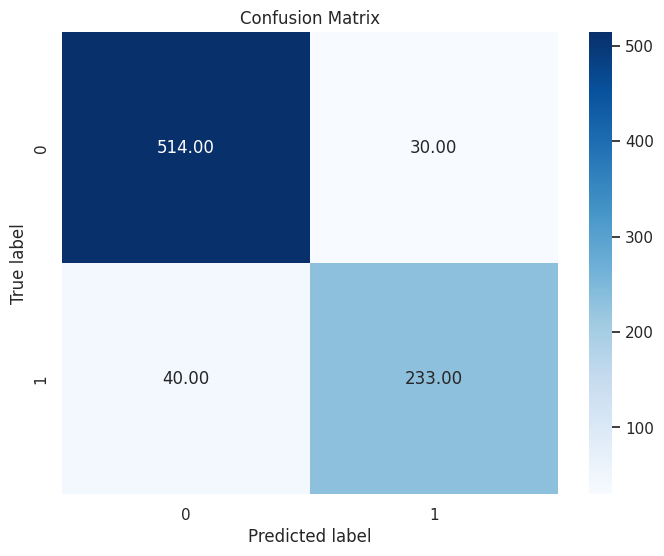

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, cmap='Blues'):
    """
    Plot a confusion matrix.

    Parameters:
    - y_true: True labels
    - y_pred: Predicted labels
    - classes: List of class labels
    - normalize: Whether to normalize the matrix or not
    - cmap: Color map for the plot
    """
    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title = 'Normalized Confusion Matrix'
    else:
        title = 'Confusion Matrix'

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt=".2f", cmap=cmap, xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Assuming classes are binary (0 and 1)
classes = [0, 1]

# Plot the confusion matrix
plot_confusion_matrix(y_test, y_pred, classes)


In [41]:

#saving the  model to use in the application
import pickle
pickle.dump(random_forest,open("RFModel.pkl",'wb'))